# Detección de Vehículos en Imágenes
Claes en el dataaset:
- car
- threewheel
- bus
- truck
- motorbike
- van

In [1]:
import os
from collections import Counter
import matplotlib.pyplot as plt
from ultralytics import YOLO

Distribución de clases en el dataset:
Clase 0: 461 ejemplos
Clase 5: 378 ejemplos
Clase 2: 403 ejemplos
Clase 1: 482 ejemplos
Clase 3: 478 ejemplos
Clase 4: 483 ejemplos


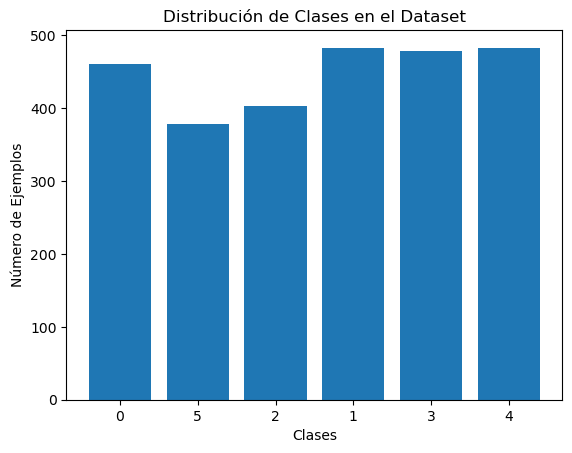

In [2]:
def class_count(path):
    class_counter = Counter()

    # Recorre todos los archivos .txt de anotaciones en el directorio
    for file in os.listdir(path):
        if file.endswith(".txt"):
            with open(os.path.join(path, file), 'r') as f:
                for line in f:
                    class_id = line.split()[0]
                    class_counter[class_id] += 1

    return class_counter

def plot_distribution(class_counter):
    clases = list(class_counter.keys())
    counts = list(class_counter.values())

    plt.bar(clases, counts)
    plt.xlabel('Clases')
    plt.ylabel('Número de Ejemplos')
    plt.title('Distribución de Clases en el Dataset')
    plt.show()

path = 'data/train/labels'
distribution_clases = class_count(path)

print("Distribución de clases en el dataset:")
for clase, cantidad in distribution_clases.items():
    print(f"Clase {clase}: {cantidad} ejemplos")

# Graficar la distribución
plot_distribution(distribution_clases)


In [3]:
# Inicializar y entrenar el modelo YOLOv8

model = YOLO("yolov8n.yaml")

results = model.train(data="config.yaml", epochs=50)

New https://pypi.org/project/ultralytics/8.2.96 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.95 🚀 Python-3.12.2 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1060 with Max-Q Design, 6057MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=config.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, 

train: Scanning /home/luciano/Documentos/Facultad/4to/2_semestre/ia2-practica/practica_yolo/vehicleDetection/data/train/labels.cache... 1890 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1890/1890 [00:00<?, ?it/s]
val: Scanning /home/luciano/Documentos/Facultad/4to/2_semestre/ia2-practica/practica_yolo/vehicleDetection/data/valid/labels.cache... 900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 900/900 [00:00<?, ?it/s]

val: WARNING ⚠️ /home/luciano/Documentos/Facultad/4to/2_semestre/ia2-practica/practica_yolo/vehicleDetection/data/valid/images/car55.jpg: corrupt JPEG restored and saved


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.35G      3.122       4.45      4.319         46        640:   5%|▌         | 6/119 [00:03<01:03,  1.77it/s]libpng warning: iCCP: known incorrect sRGB profile
       1/50      2.39G      3.047       4.22       4.08          3        640: 100%|██████████| 119/119 [01:00<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.39it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.30it/s]


                   all        900       1150    0.00333      0.711     0.0109     0.0034

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.34G      2.952      3.959      3.644         49        640:  24%|██▎       | 28/119 [00:13<00:43,  2.08it/s]libpng warning: iCCP: known incorrect sRGB profile
       2/50      2.38G      2.708      3.783      3.397          7        640: 100%|██████████| 119/119 [00:58<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:04,  3.16it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.20it/s]


                   all        900       1150      0.112       0.19     0.0505     0.0146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.33G      2.447      3.606      3.067         57        640:   4%|▍         | 5/119 [00:02<00:55,  2.05it/s]libpng warning: iCCP: known incorrect sRGB profile
       3/50      2.38G      2.198      3.394      2.844          5        640: 100%|██████████| 119/119 [00:58<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.44it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.51it/s]


                   all        900       1150      0.647      0.123      0.108      0.039

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.33G      1.974      3.139      2.582         57        640:  36%|███▌      | 43/119 [00:21<00:36,  2.06it/s]libpng warning: iCCP: known incorrect sRGB profile
       4/50      2.38G      1.897      3.022      2.497          5        640: 100%|██████████| 119/119 [00:58<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.38it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.48it/s]


                   all        900       1150      0.178       0.32      0.195     0.0868

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.33G        1.7       2.73      2.264         47        640:  49%|████▊     | 58/119 [00:28<00:29,  2.06it/s]libpng warning: iCCP: known incorrect sRGB profile
       5/50      2.37G      1.675      2.653      2.231          5        640: 100%|██████████| 119/119 [00:58<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.33it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.46it/s]

                   all        900       1150      0.255      0.431      0.295      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.34G       1.58      2.407      2.128         56        640:  81%|████████  | 96/119 [00:47<00:11,  2.00it/s]libpng warning: iCCP: known incorrect sRGB profile
       6/50      2.38G      1.562      2.373      2.107          5        640: 100%|██████████| 119/119 [00:58<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.50it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.55it/s]

                   all        900       1150      0.411      0.471      0.417      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.33G      1.481      2.249      2.028         56        640:  72%|███████▏  | 86/119 [00:42<00:16,  1.99it/s]libpng warning: iCCP: known incorrect sRGB profile
       7/50      2.37G      1.459       2.21      2.005          7        640: 100%|██████████| 119/119 [00:58<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.47it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.54it/s]

                   all        900       1150       0.44      0.551      0.514      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.33G      1.376      2.062      1.923         51        640:  61%|██████▏   | 73/119 [00:36<00:23,  1.99it/s]libpng warning: iCCP: known incorrect sRGB profile
       8/50      2.37G      1.361      2.052      1.901          3        640: 100%|██████████| 119/119 [00:58<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.50it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.57it/s]

                   all        900       1150      0.508      0.531      0.537      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.33G      1.323      1.968      1.862         44        640:  51%|█████▏    | 61/119 [00:30<00:28,  2.02it/s]libpng warning: iCCP: known incorrect sRGB profile
       9/50      2.36G      1.305      1.941      1.847          7        640: 100%|██████████| 119/119 [00:58<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.51it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.58it/s]

                   all        900       1150      0.629      0.536      0.598      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.33G      1.293      1.914      1.824         52        640:  24%|██▍       | 29/119 [00:14<00:44,  2.04it/s]libpng warning: iCCP: known incorrect sRGB profile
      10/50      2.37G       1.25      1.847      1.792          6        640: 100%|██████████| 119/119 [00:57<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.50it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.58it/s]

                   all        900       1150      0.525       0.54       0.56      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.33G      1.242      1.788      1.787         36        640:  50%|████▉     | 59/119 [00:29<00:29,  2.06it/s]libpng warning: iCCP: known incorrect sRGB profile
      11/50      2.37G      1.224      1.764      1.765          8        640: 100%|██████████| 119/119 [00:58<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.86it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.86it/s]

                   all        900       1150      0.621      0.613      0.658       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.33G       1.19      1.687       1.73         55        640:  62%|██████▏   | 74/119 [00:41<00:24,  1.80it/s]libpng warning: iCCP: known incorrect sRGB profile
      12/50      2.33G      1.167      1.656      1.706         47        640:  97%|█████████▋| 116/119 [01:04<00:01,  1.81it/s]libpng warning: iCCP: known incorrect sRGB profile
      12/50      2.37G      1.166      1.651      1.705          6        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.86it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.93it/s]

                   all        900       1150      0.677      0.625       0.68      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.36G      1.116      1.572      1.652          8        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.85it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.91it/s]

                   all        900       1150      0.688      0.625      0.685      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.33G      1.105      1.534      1.657         53        640:   1%|          | 1/119 [00:00<01:07,  1.75it/s]libpng warning: iCCP: known incorrect sRGB profile
      14/50      2.37G      1.104      1.545      1.637          6        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.88it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.94it/s]

                   all        900       1150      0.703      0.671      0.747      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.32G      1.086      1.476      1.625         65        640:  23%|██▎       | 27/119 [00:14<00:50,  1.81it/s]libpng warning: iCCP: known incorrect sRGB profile
      15/50      2.37G      1.079      1.479       1.62          6        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.88it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.95it/s]

                   all        900       1150       0.72       0.66      0.736      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.32G      1.065      1.441      1.607         51        640:  73%|███████▎  | 87/119 [00:48<00:17,  1.80it/s]libpng warning: iCCP: known incorrect sRGB profile
      16/50      2.37G      1.065      1.442      1.605          3        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.86it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.95it/s]

                   all        900       1150      0.719      0.699      0.783      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.32G      1.002      1.336      1.551         47        640:  46%|████▌     | 55/119 [00:30<00:35,  1.80it/s]libpng warning: iCCP: known incorrect sRGB profile
      17/50      2.36G      1.028      1.386      1.567          7        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.86it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.93it/s]

                   all        900       1150      0.731      0.656      0.771      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.34G      1.011      1.349      1.544         43        640:  85%|████████▍ | 101/119 [00:56<00:09,  1.81it/s]libpng warning: iCCP: known incorrect sRGB profile
      18/50      2.37G      1.006      1.348      1.541          5        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.88it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.95it/s]

                   all        900       1150      0.724      0.697      0.766      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.33G     0.9272      1.295      1.477         50        640:   8%|▊         | 9/119 [00:04<01:00,  1.80it/s]libpng warning: iCCP: known incorrect sRGB profile
      19/50      2.37G     0.9744      1.286      1.508          4        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.89it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.95it/s]

                   all        900       1150      0.747      0.676      0.782      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.32G      1.057      1.396      1.561         46        640:   7%|▋         | 8/119 [00:04<01:01,  1.81it/s]libpng warning: iCCP: known incorrect sRGB profile
      20/50      2.37G     0.9635      1.259      1.488          4        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.88it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.94it/s]

                   all        900       1150      0.821      0.701      0.824      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.33G      0.944      1.216      1.473         62        640:  88%|████████▊ | 105/119 [00:58<00:07,  1.81it/s]libpng warning: iCCP: known incorrect sRGB profile
      21/50      2.36G     0.9462      1.222      1.476          6        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.88it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.95it/s]

                   all        900       1150      0.829      0.745      0.854      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.34G      0.946      1.187      1.477         59        640:  51%|█████▏    | 61/119 [00:33<00:32,  1.80it/s]libpng warning: iCCP: known incorrect sRGB profile
      22/50      2.37G     0.9352      1.177      1.467          8        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.89it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.95it/s]

                   all        900       1150       0.83      0.747      0.844      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.32G     0.9058       1.16      1.441         58        640:  76%|███████▌  | 90/119 [00:49<00:16,  1.81it/s]libpng warning: iCCP: known incorrect sRGB profile
      23/50      2.37G     0.9103      1.168      1.445          4        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.88it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.96it/s]

                   all        900       1150      0.726      0.753        0.8      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.33G     0.9597      1.199      1.482         52        640:  20%|██        | 24/119 [00:13<00:52,  1.80it/s]libpng warning: iCCP: known incorrect sRGB profile
      24/50      2.37G     0.9088       1.13      1.436          4        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.89it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.94it/s]

                   all        900       1150       0.83      0.748      0.849      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.32G     0.8922       1.12      1.426         42        640:  76%|███████▋  | 91/119 [00:47<00:14,  1.98it/s]libpng warning: iCCP: known incorrect sRGB profile
      25/50      2.36G     0.8859      1.115      1.421          6        640: 100%|██████████| 119/119 [01:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.50it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.58it/s]

                   all        900       1150       0.84      0.772      0.874      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.33G     0.8992      1.108      1.435         40        640:  18%|█▊        | 21/119 [00:10<00:47,  2.05it/s]libpng warning: iCCP: known incorrect sRGB profile
      26/50      2.37G     0.8812      1.107      1.417          7        640: 100%|██████████| 119/119 [00:58<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.51it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.57it/s]

                   all        900       1150      0.784      0.755       0.84      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.33G     0.8843      1.111      1.418         62        640:  25%|██▌       | 30/119 [00:14<00:43,  2.03it/s]libpng warning: iCCP: known incorrect sRGB profile
      27/50      2.37G     0.8801      1.088      1.417          4        640: 100%|██████████| 119/119 [00:58<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.49it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.60it/s]

                   all        900       1150      0.828      0.784      0.874      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.32G     0.8552      1.041      1.404         49        640:  51%|█████▏    | 61/119 [00:30<00:29,  1.98it/s]libpng warning: iCCP: known incorrect sRGB profile
      28/50      2.37G     0.8388      1.031      1.383          7        640: 100%|██████████| 119/119 [00:58<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.50it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.59it/s]

                   all        900       1150      0.908      0.769      0.888       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.33G     0.8895       1.04      1.412         55        640:  16%|█▌        | 19/119 [00:09<00:48,  2.05it/s]libpng warning: iCCP: known incorrect sRGB profile
      29/50      2.36G     0.8525      1.031       1.39          6        640: 100%|██████████| 119/119 [00:58<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.50it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.59it/s]

                   all        900       1150      0.856        0.8      0.887      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.33G     0.8257     0.9949      1.363         55        640:  79%|███████▉  | 94/119 [00:45<00:11,  2.09it/s]libpng warning: iCCP: known incorrect sRGB profile
      30/50      2.37G     0.8315          1      1.368          9        640: 100%|██████████| 119/119 [00:58<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.50it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.60it/s]

                   all        900       1150      0.879        0.8      0.898      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.33G     0.8186     0.9919      1.359         58        640:  54%|█████▍    | 64/119 [00:31<00:27,  1.98it/s]libpng warning: iCCP: known incorrect sRGB profile
      31/50      2.37G     0.8259     0.9904      1.368          6        640: 100%|██████████| 119/119 [00:58<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.49it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.60it/s]

                   all        900       1150       0.87      0.824       0.91      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.33G     0.8039     0.9835      1.356         53        640:  55%|█████▍    | 65/119 [00:32<00:26,  2.00it/s]libpng warning: iCCP: known incorrect sRGB profile
      32/50      2.37G     0.8138     0.9899       1.36          8        640: 100%|██████████| 119/119 [00:59<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.89it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.97it/s]

                   all        900       1150      0.898      0.815      0.906      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.33G     0.7883     0.9293      1.337         42        640:  74%|███████▍  | 88/119 [00:48<00:17,  1.81it/s]libpng warning: iCCP: known incorrect sRGB profile
      33/50      2.36G     0.8001     0.9489      1.343          6        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.88it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.96it/s]

                   all        900       1150      0.918      0.834      0.919      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.34G     0.8399     0.9804      1.378         56        640:  31%|███       | 37/119 [00:20<00:45,  1.80it/s]libpng warning: iCCP: known incorrect sRGB profile
      34/50      2.37G     0.8013     0.9395      1.345          6        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.88it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.97it/s]

                   all        900       1150      0.888      0.834      0.913      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.32G     0.7718     0.9245      1.317         44        640:  67%|██████▋   | 80/119 [00:44<00:21,  1.80it/s]libpng warning: iCCP: known incorrect sRGB profile
      35/50      2.37G     0.7767     0.9288      1.323         12        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.88it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.94it/s]

                   all        900       1150      0.919      0.814      0.914       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.32G      0.763     0.9129      1.316         48        640:  59%|█████▉    | 70/119 [00:38<00:27,  1.80it/s]libpng warning: iCCP: known incorrect sRGB profile
      36/50      2.37G     0.7779     0.9253      1.325          5        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.89it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.97it/s]

                   all        900       1150      0.901      0.837      0.923      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.32G     0.7518     0.8738      1.309         53        640:  77%|███████▋  | 92/119 [00:51<00:14,  1.81it/s]libpng warning: iCCP: known incorrect sRGB profile
      37/50      2.36G     0.7551     0.8812       1.31          4        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.89it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.96it/s]

                   all        900       1150      0.911      0.812       0.91      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.33G     0.7937     0.9341      1.344         57        640:  19%|█▉        | 23/119 [00:12<00:54,  1.78it/s]libpng warning: iCCP: known incorrect sRGB profile
      38/50      2.37G     0.7795     0.9133      1.328          9        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.90it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.97it/s]

                   all        900       1150      0.892      0.824      0.916      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.32G     0.7375     0.8383      1.289         66        640:  55%|█████▍    | 65/119 [00:36<00:30,  1.79it/s]libpng warning: iCCP: known incorrect sRGB profile
      39/50      2.37G     0.7478     0.8517      1.298          6        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.89it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.96it/s]

                   all        900       1150      0.894      0.858      0.921      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.32G     0.7845     0.7943      1.301         54        640:   1%|          | 1/119 [00:00<01:08,  1.71it/s]libpng warning: iCCP: known incorrect sRGB profile
      40/50      2.37G     0.7288     0.8511       1.29          9        640: 100%|██████████| 119/119 [01:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.87it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.94it/s]

                   all        900       1150      0.918       0.83      0.923      0.784


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.32G     0.6277     0.6976      1.214         20        640:  76%|███████▋  | 91/119 [00:51<00:15,  1.81it/s]libpng warning: iCCP: known incorrect sRGB profile
      41/50      2.36G     0.6134     0.6718      1.201          2        640: 100%|██████████| 119/119 [01:06<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:04,  2.89it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.97it/s]

                   all        900       1150      0.926      0.852      0.926      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.34G     0.5802     0.6086      1.167         17        640:  83%|████████▎ | 99/119 [00:53<00:09,  2.02it/s]libpng warning: iCCP: known incorrect sRGB profile
      42/50      2.37G     0.5803     0.6049      1.173          2        640: 100%|██████████| 119/119 [01:02<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.51it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.58it/s]

                   all        900       1150      0.911       0.82      0.915      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.32G     0.5869     0.5965      1.169         18        640:  76%|███████▌  | 90/119 [00:43<00:13,  2.07it/s]libpng warning: iCCP: known incorrect sRGB profile
      43/50      2.37G     0.5774     0.5917      1.164          3        640: 100%|██████████| 119/119 [00:57<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.50it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.57it/s]

                   all        900       1150      0.918      0.859      0.933      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.33G     0.5424      0.569      1.125         17        640:  69%|██████▉   | 82/119 [00:40<00:18,  2.01it/s]libpng warning: iCCP: known incorrect sRGB profile
      44/50      2.37G     0.5516      0.596      1.137          2        640: 100%|██████████| 119/119 [00:57<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.49it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.58it/s]

                   all        900       1150      0.925      0.851      0.929      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.32G     0.5634     0.5823      1.157         19        640:  18%|█▊        | 21/119 [00:10<00:47,  2.08it/s]libpng warning: iCCP: known incorrect sRGB profile
      45/50      2.32G     0.5456     0.5556      1.136         24        640:  99%|█████████▉| 118/119 [00:57<00:00,  2.04it/s]libpng warning: iCCP: known incorrect sRGB profile
      45/50      2.36G     0.5437     0.5567      1.136          2        640: 100%|██████████| 119/119 [00:57<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.49it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.58it/s]

                   all        900       1150      0.933      0.855      0.927      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.37G     0.5412      0.526      1.126          3        640: 100%|██████████| 119/119 [00:57<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.55it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.63it/s]

                   all        900       1150      0.918       0.87      0.935      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.32G     0.5179      0.507       1.12         21        640:  41%|████      | 49/119 [00:23<00:33,  2.07it/s]libpng warning: iCCP: known incorrect sRGB profile
      47/50      2.37G     0.5299     0.5287      1.119          6        640: 100%|██████████| 119/119 [00:57<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.55it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.62it/s]

                   all        900       1150      0.931      0.859      0.934       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.32G     0.5094     0.5103      1.119         18        640:  29%|██▉       | 35/119 [00:16<00:40,  2.05it/s]libpng warning: iCCP: known incorrect sRGB profile
      48/50      2.37G     0.5188      0.522      1.114          2        640: 100%|██████████| 119/119 [00:57<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.55it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.63it/s]

                   all        900       1150      0.912      0.883       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.32G     0.5168     0.4967       1.11         19        640:  65%|██████▍   | 77/119 [00:37<00:20,  2.05it/s]libpng warning: iCCP: known incorrect sRGB profile
      49/50      2.36G     0.5131     0.5018      1.106          2        640: 100%|██████████| 119/119 [00:57<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.58it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.65it/s]

                   all        900       1150      0.917      0.878      0.939      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.34G     0.4755     0.4712        1.1         17        640:  13%|█▎        | 15/119 [00:07<00:51,  2.01it/s]libpng warning: iCCP: known incorrect sRGB profile
      50/50      2.37G     0.5034     0.4943      1.101          2        640: 100%|██████████| 119/119 [00:58<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:04<00:03,  3.49it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.56it/s]

                   all        900       1150      0.941      0.871      0.942      0.818



50 epochs completed in 0.990 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.2.95 🚀 Python-3.12.2 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1060 with Max-Q Design, 6057MiB)
YOLOv8n summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 16/29 [00:05<00:03,  3.26it/s]libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.16it/s]


                   all        900       1150      0.941      0.871      0.942      0.818
                   car        182        201      0.965      0.861      0.928      0.871
            threewheel        167        227      0.964       0.89      0.963      0.816
                   bus        162        185      0.971      0.919      0.976      0.893
                 truck        123        151      0.868      0.917      0.948      0.797
             motorbike        165        216      0.932      0.762      0.888       0.63
                   van        157        170      0.944      0.876      0.947      0.903
Speed: 0.3ms preprocess, 6.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train6


In [5]:
# Evaluar el modelo en el conjunto de test
model = YOLO("/home/luciano/Documentos/Facultad/4to/2_semestre/ia2-practica/practica_yolo/vehicleDetection/runs/detect/train6/weights/best.pt")

source = "/home/luciano/Documentos/Facultad/4to/2_semestre/ia2-practica/practica_yolo/vehicleDetection/data/test/images"

results = model(source, stream=True)